In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
train = pd.read_csv('Titanic-Dataset.csv')
test = pd.read_csv('test.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [161]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
train_len = len(train)
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [59]:
df.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
1304         1305       NaN       3            Spector, Mr. Woolf    male   
1305         1306       NaN       1  Oliva y Ocana, Dona. Fermina  female   
1306         1307       NaN       3  Saether, Mr. Simon Sivertsen    male   
1307         1308       NaN       3           Ware, Mr. Frederick    male   
1308         1309       NaN       3      Peter, Master. Michael J    male   

       Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
1304   NaN      0      0           A.5. 3236    8.0500   NaN        S  
1305  39.0      0      0            PC 17758  108.9000  C105        C  
1306  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307   NaN      0      0              359309    8.0500   NaN        S  
1308   NaN      1      1                2668   22.3583   NaN        C

In [61]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [63]:
df = df.drop(columns=['Cabin'], axis=1)
df['Age'].mean()

29.881137667304014

In [65]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'].mode()[0]

'S'

In [75]:
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']
X.head()

Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
def classify(model):
    print("Model is ready:", model)
classify(model)


Model is ready: LogisticRegression()


In [95]:
surv=train[train['Survived']==0]

In [97]:
pclass_1=surv[surv['Pclass']==1]
pclass_1

PassengerId  Survived  Pclass                                  Name  \
6              7         0       1               McCarthy, Mr. Timothy J   
27            28         0       1        Fortune, Mr. Charles Alexander   
30            31         0       1              Uruchurtu, Don. Manuel E   
34            35         0       1               Meyer, Mr. Edgar Joseph   
35            36         0       1        Holverson, Mr. Alexander Oskar   
..           ...       ...     ...                                   ...   
806          807         0       1                Andrews, Mr. Thomas Jr   
815          816         0       1                      Fry, Mr. Richard   
822          823         0       1       Reuchlin, Jonkheer. John George   
867          868         0       1  Roebling, Mr. Washington Augustus II   
872          873         0       1              Carlsson, Mr. Frans Olof   

      Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
6    male  54.0      0      0     17463   51.8625          E46        S  
27   male  19.0      3      2     19950  263.0000  C23 C25 C27        S  
30   male  40.0      0      0  PC 17601   27.7208          NaN        C  
34   male  28.0      1      0  PC 17604   82.1708          NaN        C  
35   male  42.0      1      0    113789   52.0000          NaN        S  
..    ...   ...    ...    ...       ...       ...          ...      ...  
806  male  39.0      0      0    112050    0.0000          A36        S  
815  male   NaN      0      0    112058    0.0000         B102        S  
822  male  38.0      0      0     19972    0.0000          NaN        S  
867  male  31.0      0      0  PC 17590   50.4958          A24        S  
872  male  33.0      0      0       695    5.0000  B51 B53 B55        S  

[80 rows x 12 columns]

In [99]:
surv

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch           Ticket     Fare Cabin Embarked  
0      male  22.0      1      0        A/5 21171   7.2500   NaN        S  
4      male  35.0      0      0           373450   8.0500   NaN        S  
5      male   NaN      0      0           330877   8.4583   NaN        Q  
6      male  54.0      0      0            17463  51.8625   E46        S  
7      male   2.0      3      1           349909  21.0750   NaN        S  
..      ...   ...    ...    ...              ...      ...   ...      ...  
884    male  25.0      0      0  SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5           382652  29.1250   NaN        Q  
886    male  27.0      0      0           211536  13.0000   NaN        S  
888  female   NaN      1      2       W./C. 6607  23.4500   NaN        S  
890    male  32.0      0      0           370376   7.7500   NaN        Q  

[549 rows x 12 columns]

In [101]:
surv['Pclass'].value_counts()

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [105]:
surv['Age'].value_counts()

Age
21.0    19
28.0    18
25.0    17
18.0    17
22.0    16
        ..
15.0     1
36.5     1
23.5     1
55.5     1
74.0     1
Name: count, Length: 77, dtype: int64

In [107]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [109]:
pclass_1['Age'].value_counts()

Age
47.0    4
45.0    3
50.0    3
54.0    2
58.0    2
64.0    2
29.0    2
38.0    2
36.0    2
31.0    2
19.0    2
62.0    2
56.0    2
61.0    2
37.0    2
24.0    2
71.0    2
46.0    2
65.0    2
28.0    2
40.0    2
49.0    1
60.0    1
70.0    1
39.0    1
18.0    1
25.0    1
55.0    1
52.0    1
30.0    1
27.0    1
22.0    1
45.5    1
2.0     1
44.0    1
51.0    1
21.0    1
42.0    1
33.0    1
Name: count, dtype: int64

In [171]:
print(df['Sex'])

0         male
1       female
2       female
3       female
4         male
         ...  
1304      male
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1309, dtype: object


In [147]:
sex=pd.get_dummies(df['Sex'])
print(sex)

      female   male
0      False   True
1       True  False
2       True  False
3       True  False
4      False   True
...      ...    ...
1304   False   True
1305    True  False
1306   False   True
1307   False   True
1308   False   True

[1309 rows x 2 columns]


In [175]:

print(df['Embarked'])

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object


In [179]:
emb=pd.get_dummies(df['Embarked'])
print(emb)

          C      Q      S
0     False  False   True
1      True  False  False
2     False  False   True
3     False  False   True
4     False  False   True
...     ...    ...    ...
1304  False  False   True
1305   True  False  False
1306  False  False   True
1307  False  False   True
1308   True  False  False

[1309 rows x 3 columns]


In [183]:
print(df['Pclass'])

0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    1
1306    3
1307    3
1308    3
Name: Pclass, Length: 1309, dtype: int64


In [185]:
pcls=pd.get_dummies(df['Pclass'],prefix="Pclass")
print(pcls)

      Pclass_1  Pclass_2  Pclass_3
0        False     False      True
1         True     False     False
2        False     False      True
3         True     False     False
4        False     False      True
...        ...       ...       ...
1304     False     False      True
1305      True     False     False
1306     False     False      True
1307     False     False      True
1308     False     False      True

[1309 rows x 3 columns]


In [194]:
df.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [200]:
df=pd.concat([df,sex,emb,pcls],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   female       1309 non-null   bool   
 9   male         1309 non-null   bool   
 10  C            1309 non-null   bool   
 11  Q            1309 non-null   bool   
 12  S            1309 non-null   bool   
 13  Pclass_1     1309 non-null   bool   
 14  Pclass_2     1309 non-null   bool   
 15  Pclass_3     1309 non-null   bool   
 16  female       1309 non-null   bool   
 17  male         1309 non-null   bool   
 18  C            1309 non-null   bool   
 19  Q     

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 301 to 37
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       568 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     165 non-null    object 
 9   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 61.2+ KB


In [204]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 301 to 37
Series name: Survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [206]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 862 to 448
Series name: Survived
Non-Null Count  Dtype
--------------  -----
179 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [208]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 862 to 448
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Name      179 non-null    object 
 2   Sex       179 non-null    object 
 3   Age       146 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Ticket    179 non-null    object 
 7   Fare      179 non-null    float64
 8   Cabin     39 non-null     object 
 9   Embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.4+ KB


<Axes: xlabel='Survived', ylabel='count'>

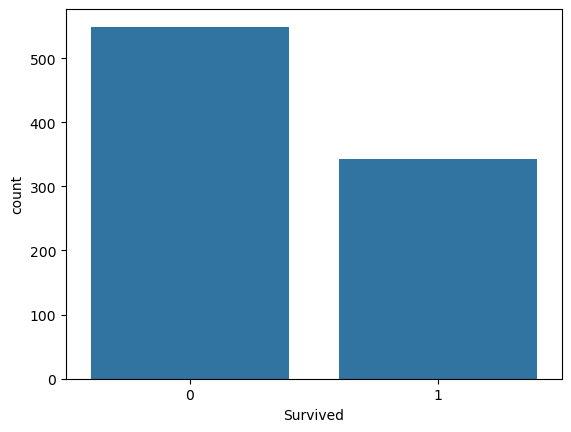

In [134]:
sns.countplot(x="Survived",data=train)

<Axes: xlabel='count', ylabel='Embarked'>

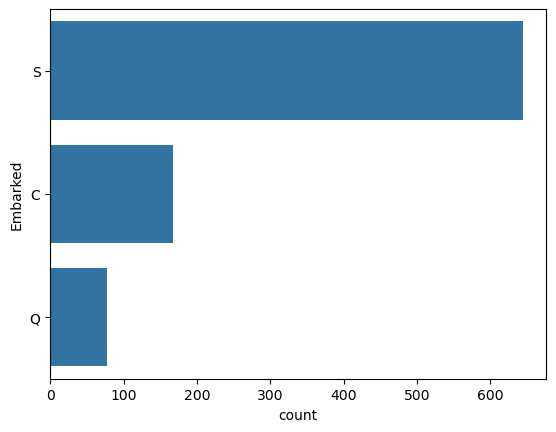

In [139]:
sns.countplot(train['Embarked'])

<Axes: xlabel='count', ylabel='Sex'>

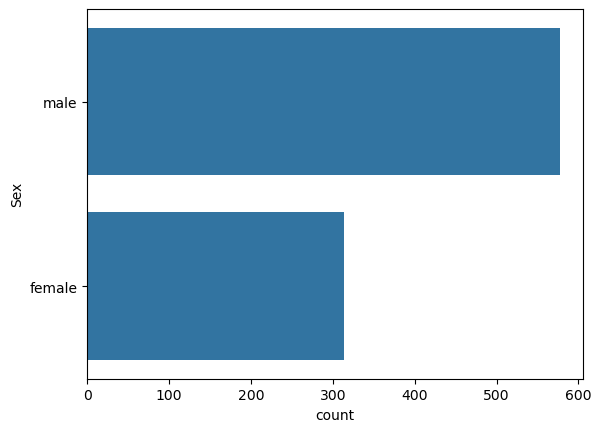

In [131]:
sns.countplot(train['Sex'])

<Axes: xlabel='Survived', ylabel='Fare'>

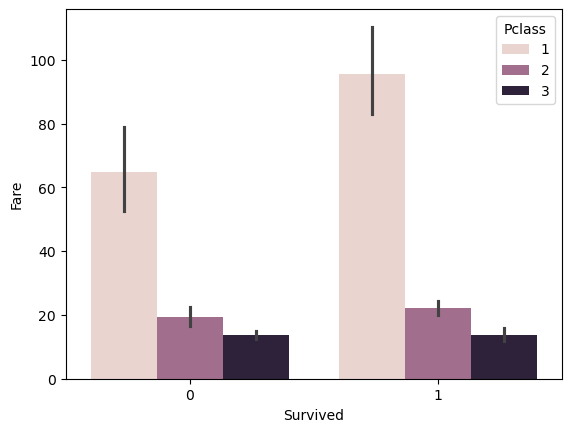

In [119]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

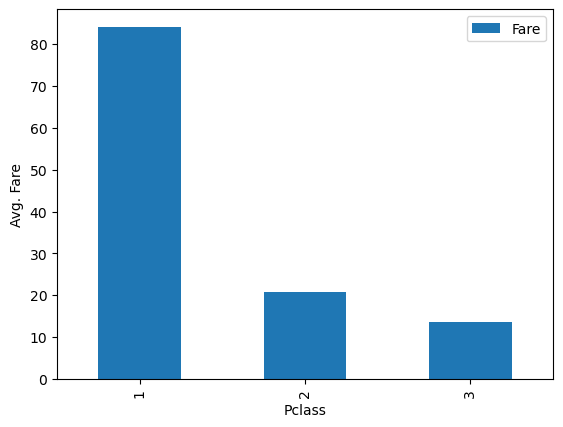

In [125]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

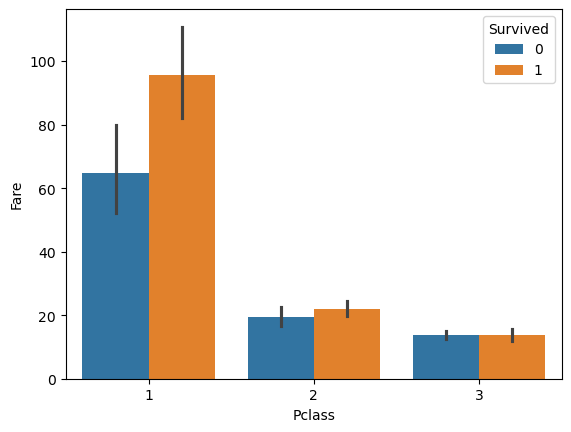

In [123]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

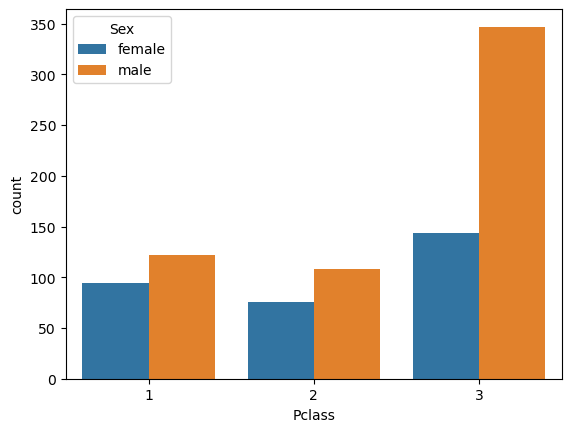

In [121]:
sns.countplot(x="Pclass",hue="Sex",data=train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4484\3219657121.py:1: FutureWarning: The provided callable <function sum at 0x0000019D908F0180> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)


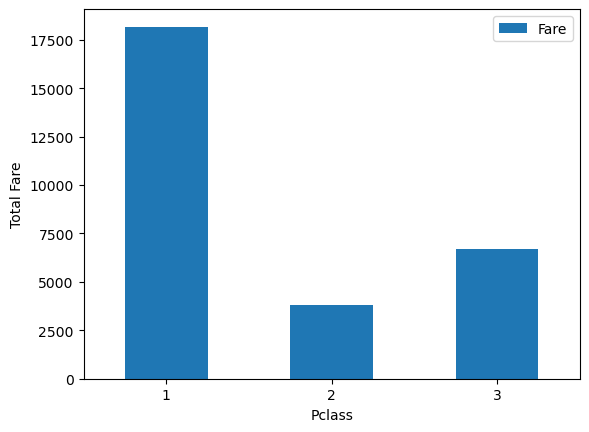

In [141]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

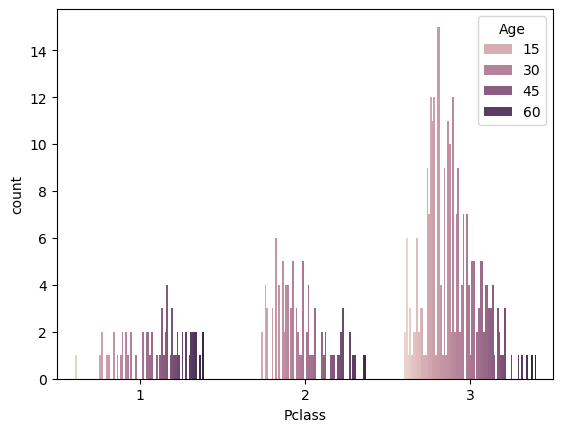

In [117]:
sns.countplot(x="Pclass",hue="Age",data=surv)

<Axes: xlabel='Pclass', ylabel='count'>

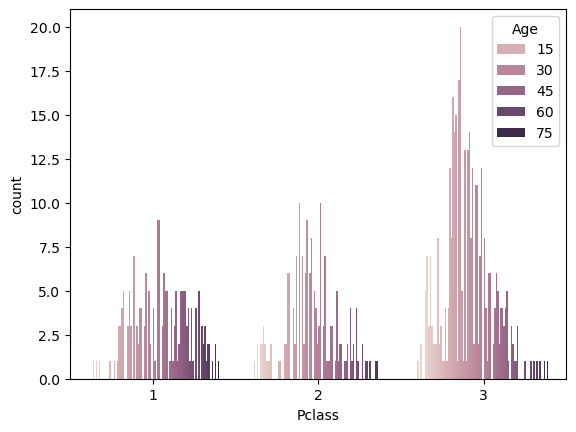

In [113]:
sns.countplot(x="Pclass",hue="Age",data=train)

<Axes: xlabel='Sex', ylabel='count'>

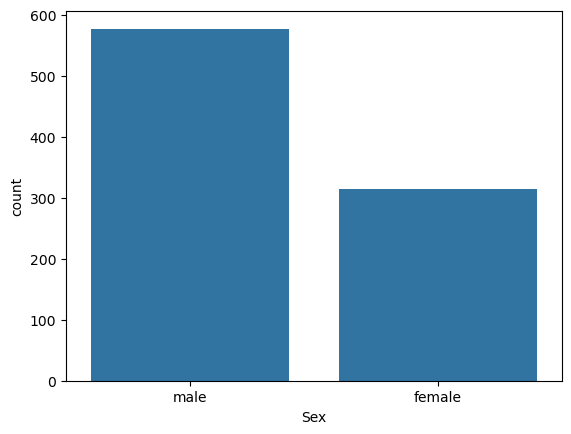

In [115]:
sns.countplot(x="Sex",data=train)